In [243]:
# !pip install -r requirements.txt

Importing Libraries

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

Reading training data

In [245]:
df = pd.read_csv("train.csv")

EDA(Exploratory Data Analysis) + Data Preprocessing

In [246]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [249]:
df.shape

(891, 12)

In [250]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [251]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

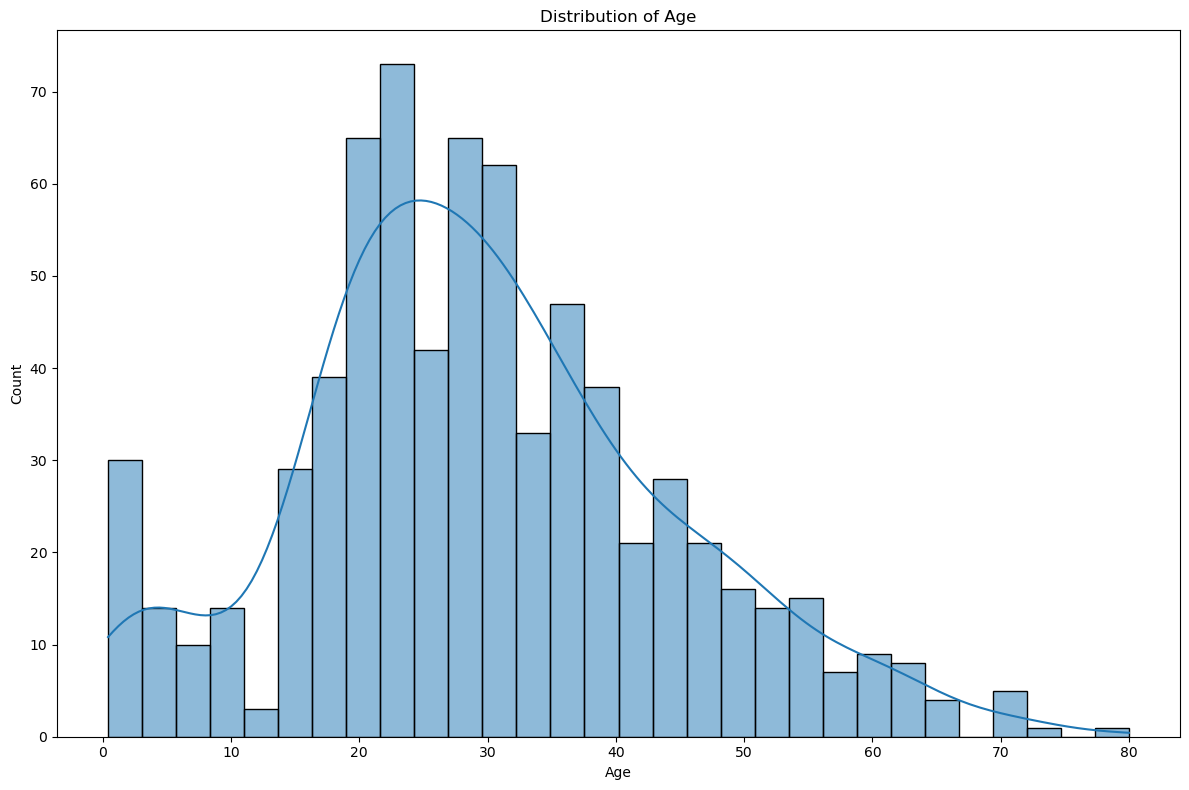

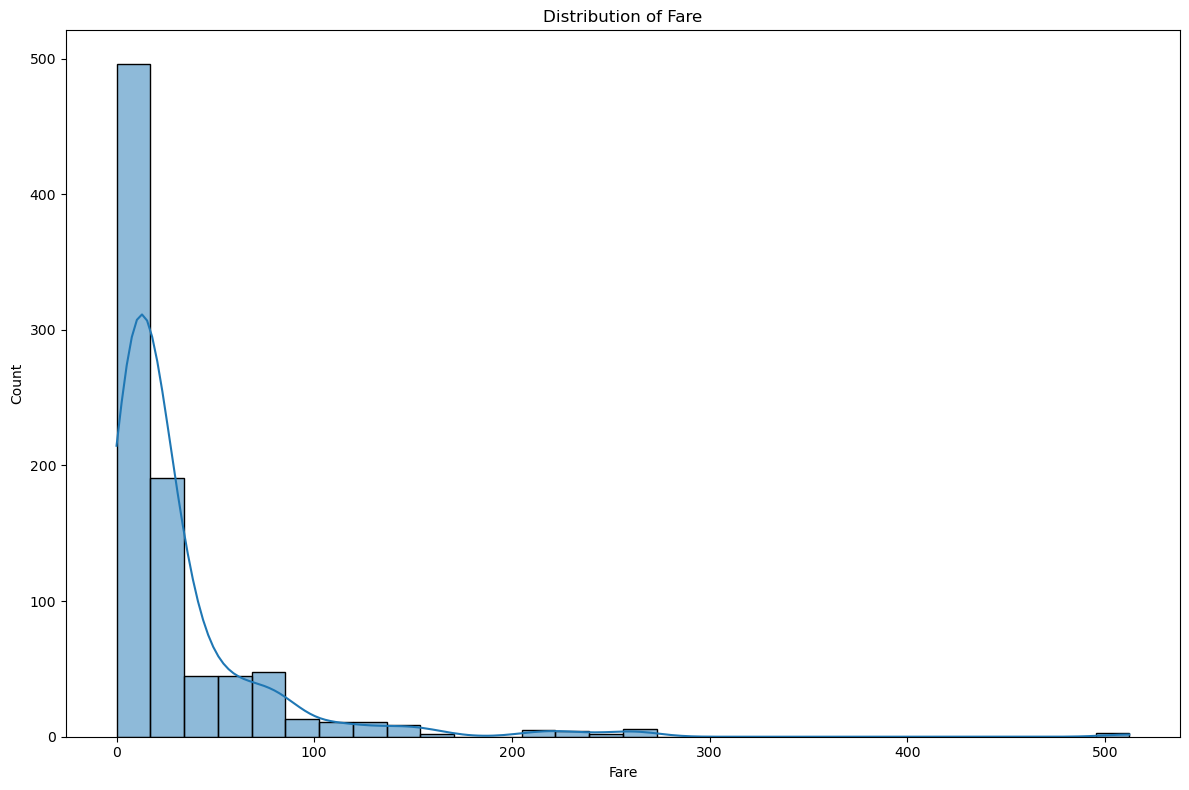

In [252]:
features = ['Age', 'Fare']  

for feature in features:
    plt.figure(figsize=(12, 8))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

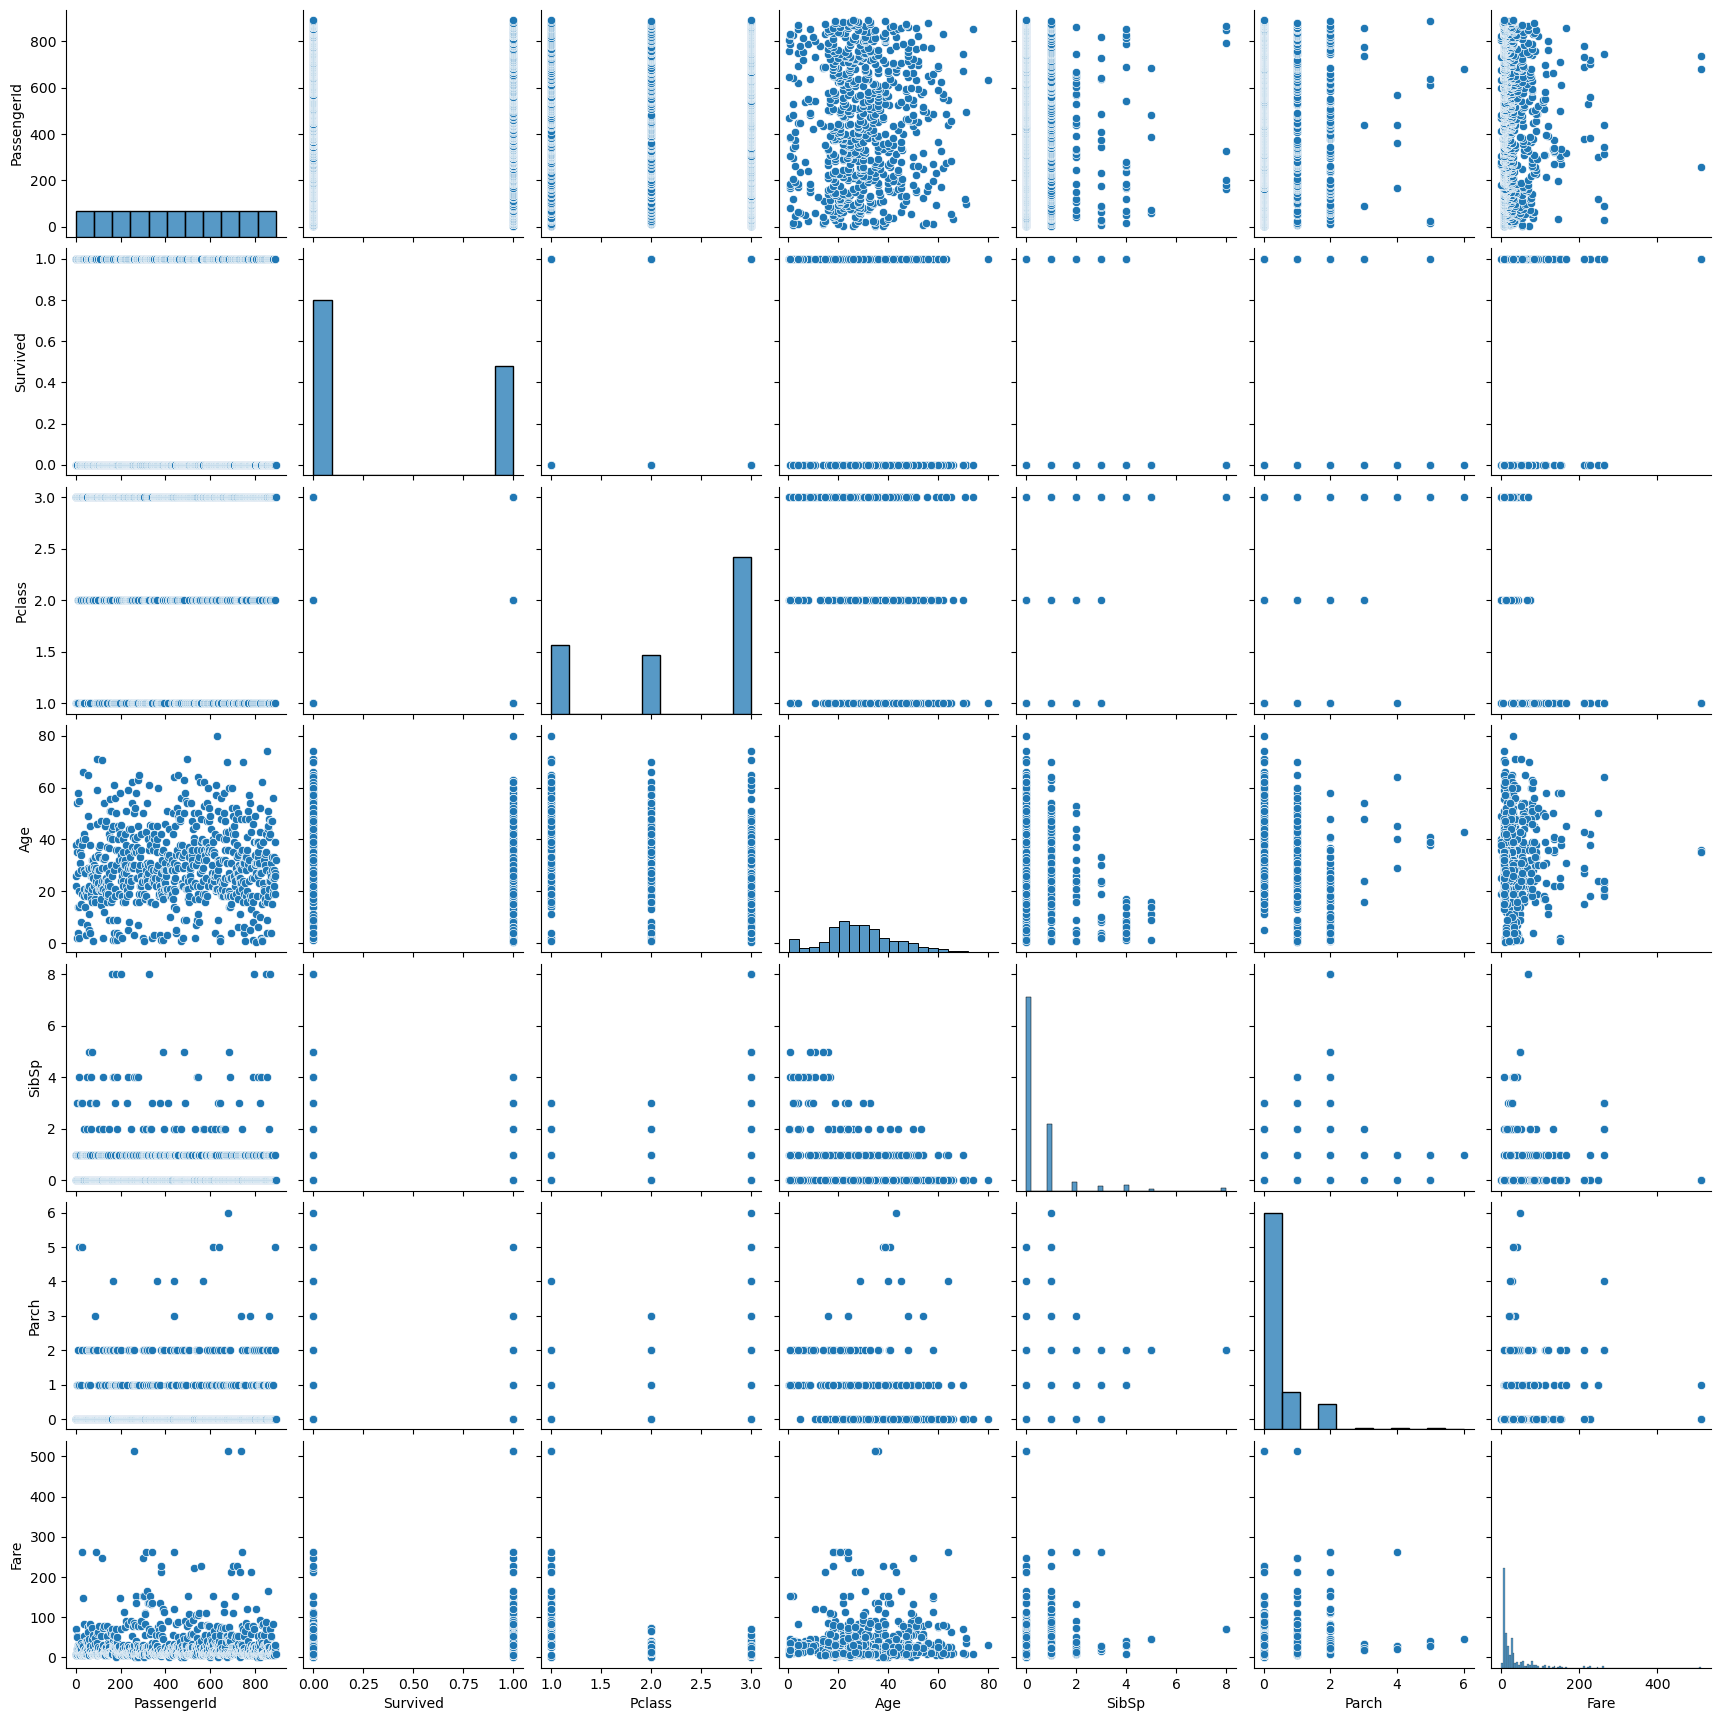

In [253]:
sns.pairplot(df,height=2.5)

In [254]:
df['Mean_age'] = df['Age'].fillna(df['Age'].mean())

In [255]:
df['Embarked'].isnull().sum()

np.int64(2)

In [256]:
mode_value = df[df['Embarked'].notna()]['Embarked'].mode()[0]
mode_value

'S'

In [257]:
df['Embarked_mode'] = df['Embarked'].fillna(mode_value)

In [258]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Mean_age           0
Embarked_mode      0
dtype: int64

In [259]:
df['Age'] = df['Mean_age']

In [260]:
df['Embarked'] = df['Embarked_mode']

In [261]:
def extract_deck(cabin):
    if pd.isnull(cabin):
        return 'Unknown'
    return cabin[0]  

df['Deck'] = df['Cabin'].apply(extract_deck)

In [262]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean_age,Embarked_mode,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,Unknown


In [263]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [264]:
df.drop(columns= (['SibSp','Parch','Cabin','Name','Mean_age','Embarked_mode','PassengerId', 'Ticket']),axis = 1, inplace = True)

In [265]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [266]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Deck'], drop_first=False)

In [267]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cols = ['Age','Fare','Pclass','Family_size']
for col in cols:
    df[col + '_scaled'] = scaler.fit_transform(df[[col]])

In [268]:
df.drop(columns = (cols), axis = 1, inplace=True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Sex_female          891 non-null    bool   
 2   Sex_male            891 non-null    bool   
 3   Embarked_C          891 non-null    bool   
 4   Embarked_Q          891 non-null    bool   
 5   Embarked_S          891 non-null    bool   
 6   Deck_A              891 non-null    bool   
 7   Deck_B              891 non-null    bool   
 8   Deck_C              891 non-null    bool   
 9   Deck_D              891 non-null    bool   
 10  Deck_E              891 non-null    bool   
 11  Deck_F              891 non-null    bool   
 12  Deck_G              891 non-null    bool   
 13  Deck_T              891 non-null    bool   
 14  Deck_Unknown        891 non-null    bool   
 15  Age_scaled          891 non-null    float64
 16  Fare_sca

In [270]:
df.drop('Deck_T', axis = 1, inplace = True)

In [271]:
df.columns

Index(['Survived', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_Unknown', 'Age_scaled', 'Fare_scaled',
       'Pclass_scaled', 'Family_size_scaled'],
      dtype='object')

In [272]:
df.head()

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown,Age_scaled,Fare_scaled,Pclass_scaled,Family_size_scaled
0,0,False,True,False,False,True,False,False,False,False,False,False,False,True,-0.592240,-0.312011,0.0,1.0
1,1,True,False,True,False,False,False,False,True,False,False,False,False,False,0.638529,2.461242,-2.0,1.0
2,1,True,False,False,False,True,False,False,False,False,False,False,False,True,-0.284548,-0.282777,0.0,0.0
3,1,True,False,False,False,True,False,False,True,False,False,False,False,False,0.407760,1.673732,-2.0,1.0
4,0,False,True,False,False,True,False,False,False,False,False,False,False,True,0.407760,-0.277363,0.0,0.0


In [273]:
corr = df.corr()
corr

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown,Age_scaled,Fare_scaled,Pclass_scaled,Family_size_scaled
Survived,1.000000,0.543351,-0.543351,0.168240,0.003650,-0.149683,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.316912,-0.069809,0.257307,-0.338481,0.016639
Sex_female,0.543351,1.000000,-1.000000,0.082853,0.074115,-0.119224,-0.078271,0.109689,0.058649,0.079248,0.047003,0.008202,0.091031,-0.140391,-0.084153,0.182333,-0.131900,0.200988
Sex_male,-0.543351,-1.000000,1.000000,-0.082853,-0.074115,0.119224,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.140391,0.084153,-0.182333,0.131900,-0.200988
Embarked_C,0.168240,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.093040,0.168642,0.113952,0.102977,-0.015939,-0.034726,-0.032371,-0.208528,0.032024,0.269335,-0.243292,-0.046215
Embarked_Q,0.003650,0.074115,-0.074115,-0.148258,1.000000,-0.499421,-0.040246,-0.072579,-0.049776,-0.060318,-0.037897,-0.004113,-0.020654,0.129572,-0.013855,-0.117216,0.221009,-0.058592
Embarked_S,-0.149683,-0.119224,0.119224,-0.782742,-0.499421,1.000000,-0.056180,-0.102063,-0.068502,-0.052254,0.037812,0.033010,0.041356,0.101139,-0.019336,-0.162184,0.074053,0.077359
Deck_A,0.022287,-0.078271,0.078271,0.093040,-0.040246,-0.056180,1.000000,-0.030880,-0.034846,-0.025663,-0.025256,-0.015923,-0.008787,-0.240136,0.121920,0.019549,-0.204934,-0.051767
Deck_B,0.175095,0.109689,-0.109689,0.168642,-0.072579,-0.102063,-0.030880,1.000000,-0.062841,-0.046280,-0.045547,-0.028715,-0.015847,-0.433053,0.091394,0.386297,-0.369572,0.004620
Deck_C,0.114652,0.058649,-0.058649,0.113952,-0.049776,-0.068502,-0.034846,-0.062841,1.000000,-0.052225,-0.051398,-0.032403,-0.017883,-0.488683,0.113149,0.364318,-0.417048,0.035347
Deck_D,0.150716,0.079248,-0.079248,0.102977,-0.060318,-0.052254,-0.025663,-0.046280,-0.052225,1.000000,-0.037852,-0.023864,-0.013170,-0.359896,0.132319,0.098878,-0.278690,-0.021566


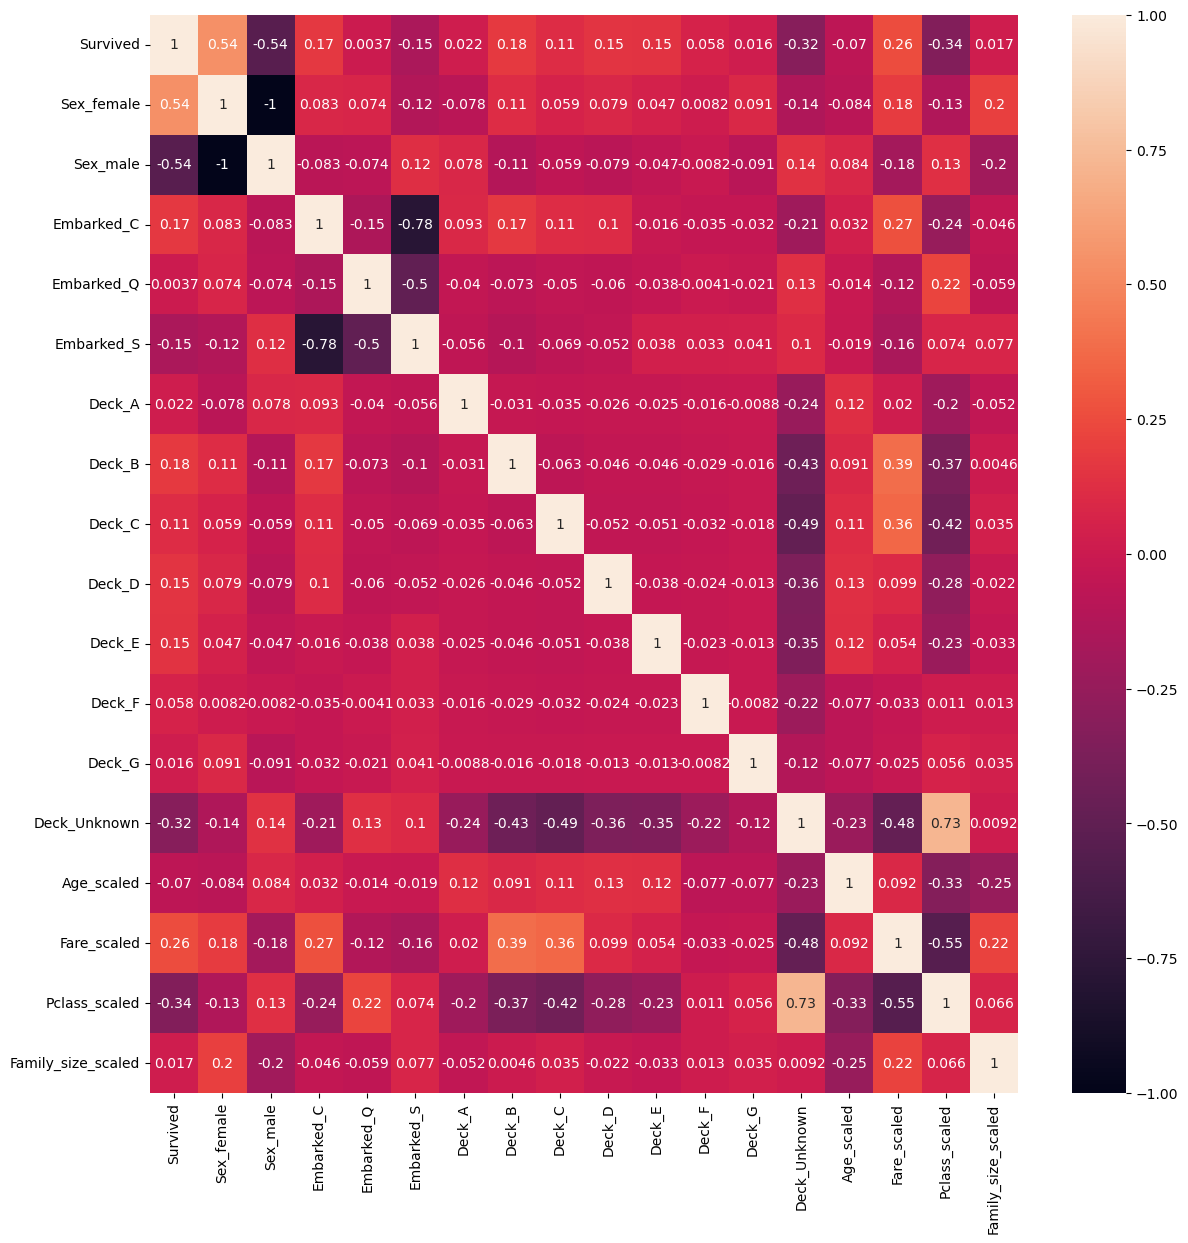

In [274]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr,annot = True)
plt.show()

Splitting training and Test Data

In [275]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model

In [276]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth= 5,
                            random_state=42
                          )
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

lgbm = LGBMClassifier(n_estimators=200, 
                      max_depth=5,
                      learning_rate=0.05, 
                      subsample=0.8,
                      colsample_bytree=0.8, 
                      random_state=42, 
                      n_jobs=-1
                    )
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, 
                                  max_depth=20,
                                  min_samples_split=4, 
                                  min_samples_leaf=2,
                                  max_features='sqrt', 
                                  random_state=42,
                                  n_jobs=-1
                                )),
    ('lgbm', LGBMClassifier(n_estimators=200, 
                      max_depth=10,
                      learning_rate=0.08, 
                      subsample=0.8,
                      colsample_bytree=0.8, 
                      random_state=42, 
                      n_jobs=-1
                    ))
]

meta_model = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
    )

stack_clf = StackingClassifier(estimators=base_models, 
                               final_estimator=meta_model, 
                               passthrough=True
                              )
stack_clf.fit(X_train, y_train)

stack_pred = stack_clf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print("RF Report:\n", classification_report(y_test, rf_pred))

print("LGBM Accuracy:", accuracy_score(y_test, lgbm_pred))
print("LGBM Report:\n", classification_report(y_test, lgbm_pred))

print("Final Accuracy:", accuracy_score(y_test, stack_pred))
print("Final Report:\n", classification_report(y_test, stack_pred))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Features Importance in Random Forest

               Feature  Importance
0           Sex_female    0.262378
1             Sex_male    0.238329
15       Pclass_scaled    0.107707
14         Fare_scaled    0.107478
13          Age_scaled    0.096104
16  Family_size_scaled    0.072447
12        Deck_Unknown    0.044074
9               Deck_E    0.014453
4           Embarked_S    0.012977
2           Embarked_C    0.012464
6               Deck_B    0.009232
7               Deck_C    0.006346
3           Embarked_Q    0.005550
8               Deck_D    0.005081
10              Deck_F    0.003421
11              Deck_G    0.001355
5               Deck_A    0.000605


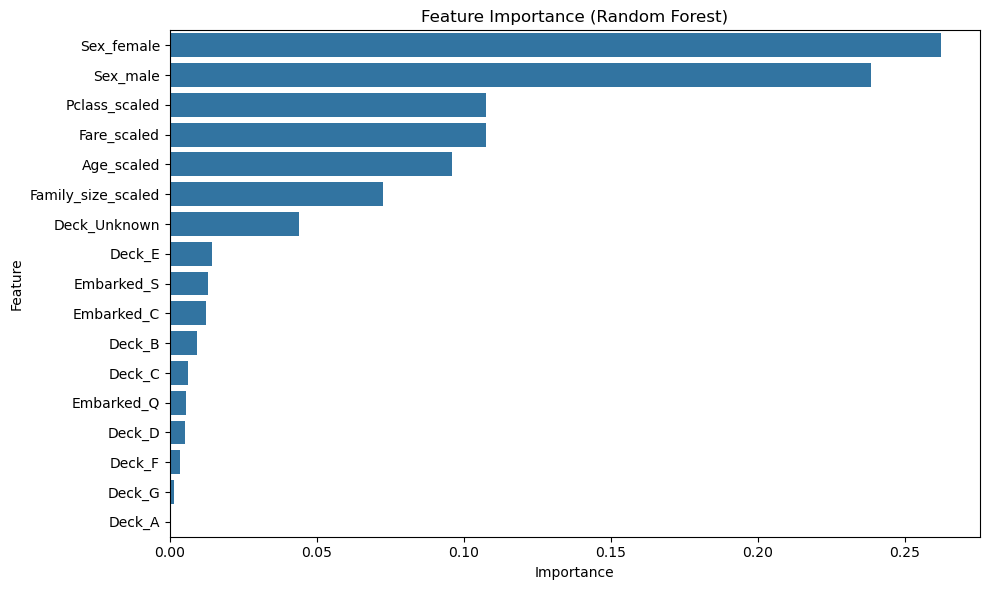

In [277]:
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
print(feat_imp_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

Reading Test Data

In [278]:
test = pd.read_csv('test.csv')

Test data processing

In [279]:
test['Mean_age'] = test['Age'].fillna(test['Age'].mean())
mode_value = test[test['Embarked'].notna()]['Embarked'].mode()[0]
test['Embarked_mode'] = test['Embarked'].fillna(mode_value)
test['Age'] = test['Mean_age']
test['Embarked'] = test['Embarked_mode']
test['Family_size'] = test['SibSp'] + test['Parch'] + 1
scaler = RobustScaler()
cols = ['Age','Fare','Pclass','Family_size']
for col in cols:
    test[col + '_scaled'] = scaler.fit_transform(test[[col]])
test.drop(columns = (cols), axis = 1, inplace=True)

def extract_deck(cabin):
    if pd.isnull(cabin):
        return 'Unknown'
    return cabin[0]  

test['Deck'] = test['Cabin'].apply(extract_deck)

test.drop(columns = (['Cabin','Name','Mean_age','Embarked_mode','PassengerId', 'Ticket','SibSp','Parch']), axis = 1, inplace =  True)

test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Deck'], drop_first=False)

In [280]:
test.isnull().sum()

Age_scaled            0
Fare_scaled           1
Pclass_scaled         0
Family_size_scaled    0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Deck_A                0
Deck_B                0
Deck_C                0
Deck_D                0
Deck_E                0
Deck_F                0
Deck_G                0
Deck_Unknown          0
dtype: int64

In [281]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_scaled          418 non-null    float64
 1   Fare_scaled         417 non-null    float64
 2   Pclass_scaled       418 non-null    float64
 3   Family_size_scaled  418 non-null    float64
 4   Sex_female          418 non-null    bool   
 5   Sex_male            418 non-null    bool   
 6   Embarked_C          418 non-null    bool   
 7   Embarked_Q          418 non-null    bool   
 8   Embarked_S          418 non-null    bool   
 9   Deck_A              418 non-null    bool   
 10  Deck_B              418 non-null    bool   
 11  Deck_C              418 non-null    bool   
 12  Deck_D              418 non-null    bool   
 13  Deck_E              418 non-null    bool   
 14  Deck_F              418 non-null    bool   
 15  Deck_G              418 non-null    bool   
 16  Deck_Unk

In [282]:
test.head(2)

,Age_scaled,Fare_scaled,Pclass_scaled,Family_size_scaled,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown
0,0.331562,-0.28067,0.0,0.0,False,True,False,True,False,False,False,False,False,False,False,False,True
1,1.311954,-0.31580,0.0,1.0,True,False,False,False,True,False,False,False,False,False,False,False,True


In [283]:
test = test[['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_Unknown', 'Age_scaled', 'Fare_scaled',
       'Pclass_scaled', 'Family_size_scaled']]

Creating Submission file

In [284]:
test_preds = stack_clf.predict(test)

submission = pd.DataFrame({
    'PassengerId': pd.read_csv("test.csv")['PassengerId'],
    'Survived': test_preds
})
submission.to_csv("submission.csv", index=False)
print("Done")

Done


Final testing on test target dataset

In [285]:
test_res = pd.read_csv('test_target.csv')

In [286]:
y_test_final = test_res['Survived']

In [287]:
print("Final Accuracy:", accuracy_score(y_test_final, test_preds))
print("Final Report:\n", classification_report(y_test_final, test_preds))

Final Accuracy: 0.8588516746411483
Final Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       266
           1       0.86      0.73      0.79       152

    accuracy                           0.86       418
   macro avg       0.86      0.83      0.84       418
weighted avg       0.86      0.86      0.86       418



Final accuracy on test data is 0.8588516746411483